In [2]:
%pip install numpy
%pip install matplotlib 
%pip install statsmodels
%pip install pandas
%pip install seaborn

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 1.5 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/12.9 MB 1.3 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/12.9 MB 1.3 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/12.9 MB 1.3 MB/s eta 0:00:10
   ---- ----------------------------------- 1.6/12.9 MB 1.2 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/12.9 MB 1.2 MB/s eta 0:00:09
   ------ --------------------------------- 2.1/12.9 MB 1.2 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/12.9 MB 1.2 MB/s eta 0:00:09
   -------- ------------------------------- 2.6/12.9 MB 1.2 MB/s eta 0:00:09
   -------- ------------------------------- 2.9/12.9 MB 1.2 MB/s eta 0:00:09
   --------- ------------------------------ 3.1/12.9 MB 1.2 MB/s eta 0:00:09
   ----------

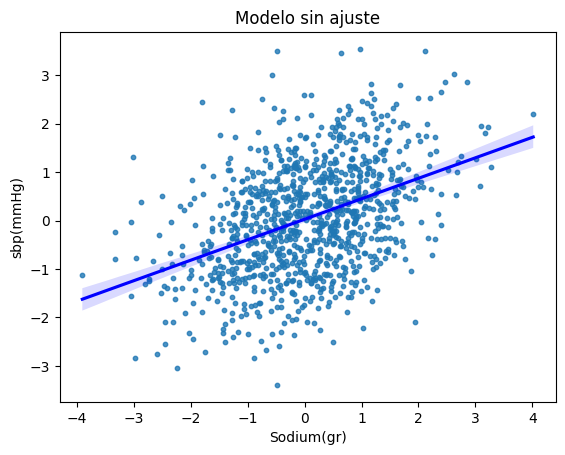

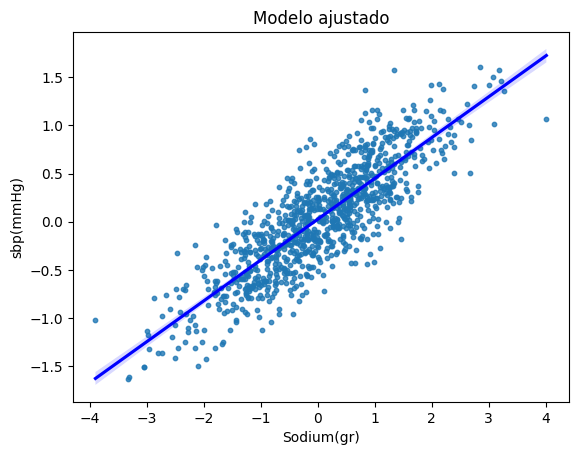

Modelo sin ajuste:
                             OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     207.3
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           7.54e-43
Time:                        17:20:06   Log-Likelihood:                -1465.9
No. Observations:                1000   AIC:                             2936.
Df Residuals:                     998   BIC:                             2946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0257      0.033

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Parámetros
N = 1000
np.random.seed(777)

# Generación de datos - Box 1
#Vamos a comparar los modelos con y sin variable de confusión 
W = np.random.randn(N) #confusor, que va a ser variable aleatoria normal estandariazada con media 0 y varianza 1
A = 0.5 * W + np.random.randn(N) #exposición 
Y = 0.3 * A + 0.4 * W + np.random.randn(N) #outcome

# Modelos de regresión
df = pd.DataFrame({'A': A, 'W': W, 'Y': Y})  

fit1 = smf.ols('Y ~ A ', data=df).fit() #modelo crudo
fit2 = smf.ols('Y ~ A + W', data=df).fit()

# Visualización 

#Figura 2.A, valor predicho de SBP del modelo crudo.

sns.regplot(x=df['A'], y=df['Y'], scatter_kws={'s': 10}, line_kws={"color": "blue"})
plt.xlabel("A")
plt.ylabel("Y")
plt.title("Modelo sin ajuste")
plt.show()

#Figura 2.B, valor predicho de SBP del modelo ajustado por el confusor
#Corresponde a la representación de la figura 1.A
sns.regplot(x=df['A'], y=fit2.predict(df), scatter_kws={'s': 10}, line_kws={"color": "blue"})
plt.xlabel("A")
plt.ylabel("Y")
plt.title("Modelo ajustado")
plt.show()

# 🔹 Mostrar los coeficientes de regresión
print("Modelo sin ajuste:\n", fit1.summary())
print("Modelo ajustado por W:\n", fit2.summary())


In [11]:
print("Modelo ajustado por W:\n", fit2.summary())

Modelo ajustado por W:
                             OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     158.7
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           1.45e-60
Time:                        17:20:43   Log-Likelihood:                -1422.1
No. Observations:                1000   AIC:                             2850.
Df Residuals:                     997   BIC:                             2865.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0182      0

Como la primera regresión no está condicionada por W , presenta un poco de sesgo ascendente en el coeficiente de A, que sae 0.4228.
Por otro lado, la segunda regresión cierra el back-door path al incluir el confusor W , y estima el efecto causal como 0.3017  , cercano al verdadero coeficiente, que sería 0.3

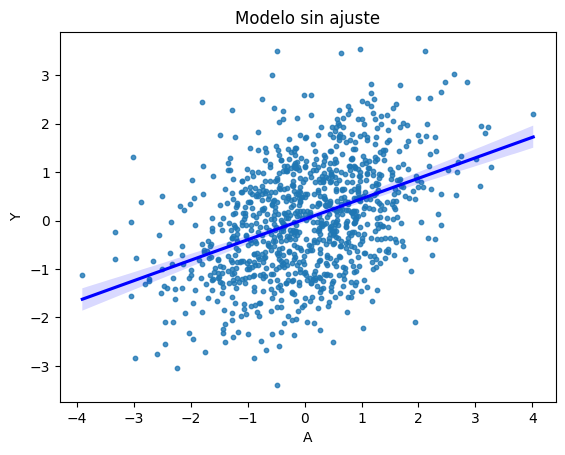

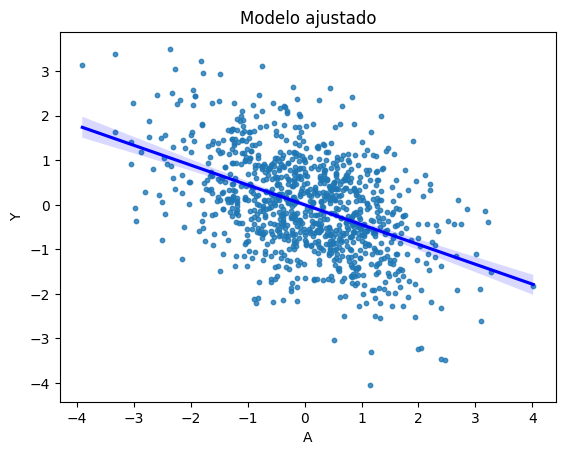

Modelo sin ajuste:
                             OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     207.3
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           7.54e-43
Time:                        17:32:55   Log-Likelihood:                -1465.9
No. Observations:                1000   AIC:                             2936.
Df Residuals:                     998   BIC:                             2946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0257      0.033

In [ ]:
# Box 2: Introducción del Collider
#Ahora vamos a generar datos consistentes con la figura 2.B
A = np.random.randn(N) #exposición
Y = 0.3 * A + np.random.randn(N)  #outcome
C = 1.2 * A + 0.9 * Y + np.random.randn(N)  #colisionador 

df_collider = pd.DataFrame({'A': A, 'Y': Y, 'C': C})
fit3 = smf.ols('Y ~ A', data=df_collider).fit()
fit4 = smf.ols('Y ~ A + C', data=df_collider).fit()

#Visualización 
#Figura 2.A, valor predicho de SBP del modelo crudo.

sns.regplot(x=df['A'], y=df['Y'], scatter_kws={'s': 10}, line_kws={"color": "blue"})
plt.xlabel("A")
plt.ylabel("Y")
plt.title("Modelo sin ajuste")
plt.show()

#Figura 2.B, valor predicho de SBP del modelo ajustado por el confusor
#Corresponde a la representación de la figura 1.B
sns.regplot(x=df['A'], y=fit4.predict(df), scatter_kws={'s': 10}, line_kws={"color": "blue"})
plt.xlabel("A")
plt.ylabel("Y")
plt.title("Modelo ajustado")
plt.show()


# 🔹 Mostrar los coeficientes de regresión
print("Modelo sin ajuste:\n", fit3.summary())
print("Modelo ajustado por W:\n", fit4.summary())

Y, efectivamente esto es lo que ocurre al condicionar por un colisionador, que se incluye una asociación negativa entre el potencial outcome (Y) y la exposición (A) y la presunción de la ignorabilidad condicional ya no se sostiene.
Esto es una paradójica de asociación negativa (PARADOJA DE BERKSON). Y esto se da cuando tanyo A como Y están positivamente correlacionados con el colisionador.
A pesar de que el modelo con el colisionador tiene una menor AIC

Condicionar por el colisionador (C) abre un black-door path entre A e Y, que antes estaba bloqueado por el propio colisionador.

Por lo tanto, la asociación entre A e Y será una combinación del efecto real de A sobre 
Y y la asociación espuria causada por el camino de puerta trasera abierto. En consecuencia, la asociación ya no representará una relación causal.

Ahora bien, ¿qué pasa si tenemos tanto un confusor como un colisionador como en el ejemplo de la ingesta de sodio ?

In [ ]:
#La relación causal entre las variables se puede apreciar en la figura 3 
#La edad es el confusor y la proteinuria es el colisionador 

# Box 3: Generación de datos para predecir la SBP (hipertensión)
def generate_data(n, seed):
    np.random.seed(seed)
    Age_years = np.random.normal(65, 5, n)
    Sodium_gr = Age_years / 18 + np.random.randn(n) #sumamos un  termino de error aleatorio
    sbp_in_mmHg = 1.05 * Sodium_gr + 2.00 * Age_years + np.random.randn(n)
    hypertension = (sbp_in_mmHg >= 140).astype(int)
    Proteinuria_in_mg = 2.00 * sbp_in_mmHg + 2.80 * Sodium_gr + np.random.randn(n)
    
    return pd.DataFrame({'sbp_in_mmHg': sbp_in_mmHg, 'hypertension': hypertension, 
                         'Sodium_gr': Sodium_gr, 'Age_years': Age_years, 'Proteinuria_in_mg': Proteinuria_in_mg})

ObsData = generate_data(1000, 777)

# Modelos de regresión con y sin confusores
fita = smf.ols('sbp_in_mmHg ~ Sodium_gr', data=ObsData).fit()
fitb = smf.ols('sbp_in_mmHg ~ Sodium_gr + Age_years', data=ObsData).fit()
fitc = smf.ols('sbp_in_mmHg ~ Sodium_gr + Age_years + Proteinuria_in_mg', data=ObsData).fit()

# Box 5: Modelos logísticos con y sin confusores 
fit3 = smf.logit('hypertension ~ Sodium_gr', data=ObsData).fit()
fit4 = smf.logit('hypertension ~ Sodium_gr + Age_years', data=ObsData).fit()
fit5 = smf.logit('hypertension ~ Sodium_gr + Age_years + Proteinuria_in_mg', data=ObsData).fit()

# Odd ratios (OR) e intervalos de confianza (CI)
def get_or_ci(fit):
    or_value = np.exp(fit.params[1])
    conf = np.exp(fit.conf_int().iloc[1])
    return or_value, conf[0], conf[1]

results = {
    "Crude": get_or_ci(fit3),
    "Adjusted": get_or_ci(fit4),
    "Collider": get_or_ci(fit5)
}

for model, (or_value, lci, uci) in results.items():
    print(f"{model}: OR = {or_value:.3f}, 95% CI = ({lci:.3f}, {uci:.3f})")

Optimization terminated successfully.
         Current function value: 0.551845
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.073625
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.021574
         Iterations 16
Crude: OR = 1.782, 95% CI = (1.527, 2.079)
Adjusted: OR = 7.772, 95% CI = (4.227, 14.289)
Collider: OR = 0.002, 95% CI = (0.000, 0.060)


C:\Users\jimen\AppData\Local\Temp\ipykernel_30668\2420935286.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  or_value = np.exp(fit.params[1])
C:\Users\jimen\AppData\Local\Temp\ipykernel_30668\2420935286.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  or_value = np.exp(fit.params[1])
C:\Users\jimen\AppData\Local\Temp\ipykernel_30668\2420935286.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  or_value = np.exp(fit.params

Bias: 1.9603
Relative Bias: 186.68%
Pragmatic CI: (-0.9313, -0.8890)


C:\Users\jimen\AppData\Local\Temp\ipykernel_30668\2420935286.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  true_values.append(true_model.params[1])
C:\Users\jimen\AppData\Local\Temp\ipykernel_30668\2420935286.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  collider_values.append(collider_model.params[1])
C:\Users\jimen\AppData\Local\Temp\ipykernel_30668\2420935286.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_v

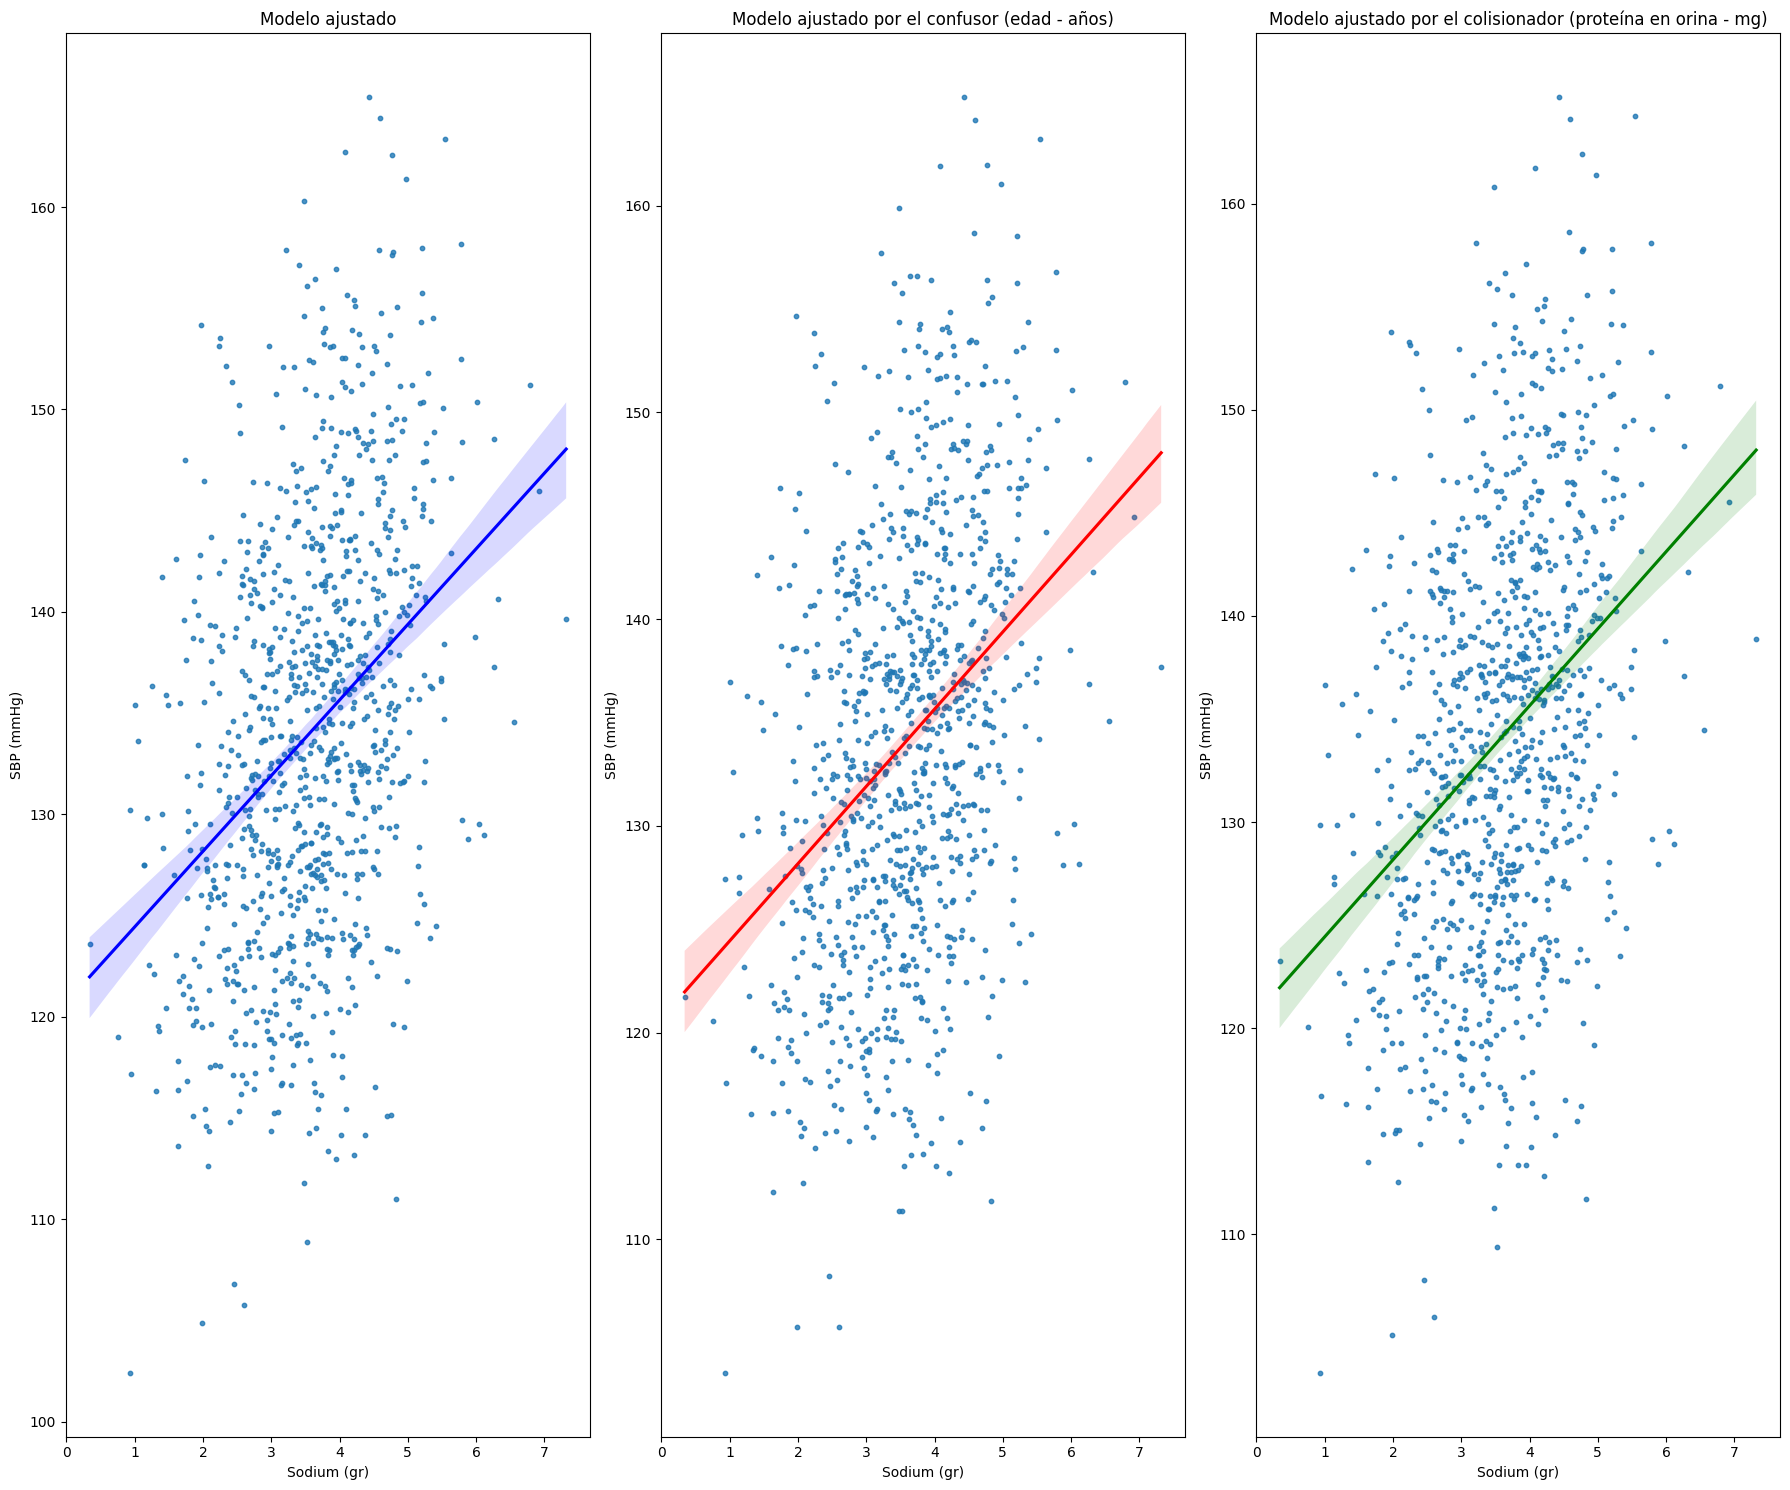

Modelo sin ajuste:
                             OLS Regression Results                            
Dep. Variable:            sbp_in_mmHg   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     152.5
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           1.03e-32
Time:                        18:51:33   Log-Likelihood:                -3684.5
No. Observations:                1000   AIC:                             7373.
Df Residuals:                     998   BIC:                             7383.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.7032      1.123

In [ ]:
#Visualización de las regresiones

np.random.seed(777)
Age_years = np.random.normal(65, 5, 1000)
Sodium_gr = Age_years / 18 + np.random.randn(1000) #sumamos un  termino de error aleatorio
sbp_in_mmHg = 1.05 * Sodium_gr + 2.00 * Age_years + np.random.randn(1000)
Proteinuria_in_mg = 2.00 * sbp_in_mmHg + 2.80 * Sodium_gr + np.random.randn(1000)
hypertension = (sbp_in_mmHg >= 140).astype(int)

ObsData = pd.DataFrame({'sbp_in_mmHg': sbp_in_mmHg,'Sodium_gr': Sodium_gr, 'Age_years': Age_years, 'Proteinuria_in_mg': Proteinuria_in_mg})
#Lineales 
# Modelos de regresión con y sin confusores
fita = smf.ols('sbp_in_mmHg ~ Sodium_gr', data=ObsData).fit()
fitb = smf.ols('sbp_in_mmHg ~ Sodium_gr + Age_years', data=ObsData).fit()
fitc = smf.ols('sbp_in_mmHg ~ Sodium_gr + Age_years + Proteinuria_in_mg', data=ObsData).fit()

# 🔹 Visualización de los modelos de regresión lineal (SBP ~ Sodium)
plt.figure(figsize=(18, 15))

# Modelo crudo (sin ajuste)
plt.subplot(1, 3, 1)
sns.regplot(x=ObsData['Sodium_gr'], y=ObsData['sbp_in_mmHg'], scatter_kws={'s': 10}, line_kws={"color": "blue"})
plt.xlabel("Sodium (gr)")
plt.ylabel("SBP (mmHg)")
plt.title("Modelo ajustado")

# Modelo con confusor (edad)
plt.subplot(1, 3, 2)
sns.regplot(x=ObsData['Sodium_gr'], y=fitb.predict(ObsData), scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.xlabel("Sodium (gr)")
plt.ylabel("SBP (mmHg)")
plt.title("Modelo ajustado por el confusor (edad - años)")

# Modelo con colisionador proteurina 
plt.subplot(1, 3, 3)
sns.regplot(x=ObsData['Sodium_gr'], y=fitc.predict(ObsData), scatter_kws={'s': 10}, line_kws={"color": "green"})
plt.xlabel("Sodium (gr)")
plt.ylabel("SBP (mmHg)")
plt.title("Modelo ajustado por el colisionador (proteína en orina - mg)")

# 🔹 Ajustar el espacio entre gráficos y mostrar
plt.tight_layout()
plt.show()

# 🔹 Mostrar los coeficientes de regresión
print("Modelo sin ajuste:\n", fita.summary())
print("Modelo ajustado por edad:\n", fitb.summary())
print("Modelo ajustado por proteininuria:\n", fitc.summary())

El modelo con colisionador debería sugerir una relación negativa entre la ingesta de sodio y la SBP , a ellos les sale de -0.9mmHg; es decir, por la ingesta de 1gr de sodio , la SBP esperada decrece un 0.9
A mi me sale un valor muy pequeño y cercano a cero pero no negativo

Optimization terminated successfully.
         Current function value: 0.558679
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.050024
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.019220
         Iterations 16


C:\Users\jimen\AppData\Local\Temp\ipykernel_30668\989676935.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  or3 = np.round(np.exp(fit3.params)[1], 3)
C:\Users\jimen\AppData\Local\Temp\ipykernel_30668\989676935.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  or4 = np.round(np.exp(fit4.params)[1], 3)
C:\Users\jimen\AppData\Local\Temp\ipykernel_30668\989676935.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  or5 = np.round

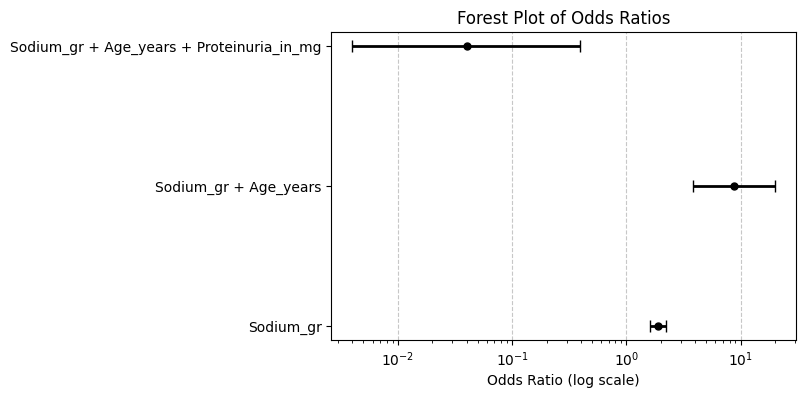

In [38]:
#En cuanto a la visualización logística 
# Fit models
fit3 = smf.logit("hypertension ~ Sodium_gr", data=ObsData).fit()
fit4 = smf.logit("hypertension ~ Sodium_gr + Age_years", data=ObsData).fit()
fit5 = smf.logit("hypertension ~ Sodium_gr + Age_years + Proteinuria_in_mg", data=ObsData).fit()

# Calculate odds ratios and 95% confidence intervals
or3 = np.round(np.exp(fit3.params)[1], 3)
ci95_3 = np.exp(fit3.conf_int()).iloc[1, :]

or4 = np.round(np.exp(fit4.params)[1], 3)
ci95_4 = np.exp(fit4.conf_int()).iloc[1, :]

or5 = np.round(np.exp(fit5.params)[1], 3)
ci95_5 = np.exp(fit5.conf_int()).iloc[1, :]

# Prepare results for the forest plot
results = pd.DataFrame({
    'Variable': ['Sodium_gr', 'Sodium_gr + Age_years', 'Sodium_gr + Age_years + Proteinuria_in_mg'],
    'OR': [or3, or4, or5],
    'CI_lower': [ci95_3[0], ci95_4[0], ci95_5[0]],
    'CI_upper': [ci95_3[1], ci95_4[1], ci95_5[1]],
})

# Plotting the forest plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.errorbar(results['OR'], np.arange(len(results)), xerr=[results['OR'] - results['CI_lower'], results['CI_upper'] - results['OR']],
             fmt='o', color='black', markersize=5, elinewidth=2, capsize=4)

ax.set_yticks(np.arange(len(results)))
ax.set_yticklabels(results['Variable'])
ax.set_xscale('log')
ax.set_xlabel('Odds Ratio (log scale)')
ax.set_title('Forest Plot of Odds Ratios')

plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()
